In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

In [2]:
from rembg import remove
board_path = "Assignment/data/BOARDS/"
#待处理的图片路径
input_path = board_path+'BOARD'+'1'+'-'+'1'+'.jpg'
#处理后存储的图片路径
output_path = 'output.png'

with open(input_path, 'rb') as i:
    with open(output_path, 'wb') as o:
        input = i.read()
        output = remove(input)
        o.write(output)

100%|#######################################| 176M/176M [00:00<00:00, 88.0GB/s]


In [2]:
# Path
board_path = "Assignment/data/BOARDS/"

image_paths = []
images = []
images_grey = []
for i in range(3):
    index = str(i + 1)
    board_path_i = []
    image = []
    image_grey = []
    for j in range(3):
        jedex = str(j + 1)
        path = board_path+'BOARD'+index+'-'+jedex+'.jpg'
        board_path_i.append(path)
        im = cv2.imread(path)
        image.append(im)
        grey = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        image_grey.append(grey)
    image_paths.append(board_path_i)
    images.append(image)
    images_grey.append(image_grey)

In [3]:
# Function to align images based on ORB features
def align_images(base_image, align_image):
    # Initialize ORB detector
    orb = cv2.ORB_create()
    # Find the keypoints and descriptors with ORB
    keypoints1, descriptors1 = orb.detectAndCompute(base_image, None)
    keypoints2, descriptors2 = orb.detectAndCompute(align_image, None)

    # Create BFMatcher object
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # Match descriptors
    matches = bf.match(descriptors1, descriptors2)

    # Sort them in the order of their distance
    matches = sorted(matches, key=lambda x: x.distance)

    # Extract location of good matches
    points1 = np.zeros((len(matches), 2), dtype=np.float32)
    points2 = np.zeros((len(matches), 2), dtype=np.float32)

    for i, match in enumerate(matches):
        points1[i, :] = keypoints1[match.queryIdx].pt
        points2[i, :] = keypoints2[match.trainIdx].pt

    # Find homography
    h, mask = cv2.findHomography(points2, points1, cv2.RANSAC)

    # Use homography to warp image
    height, width = base_image.shape
    aligned_image = cv2.warpPerspective(align_image, h, (width, height))
    
    return aligned_image

In [4]:
def aligned_them(im1, im2, boardnum, imagenum):
    aligned = align_images(im1, im2)
    plt.imshow(aligned, cmap='gray')
    plt.title('Aligned BOARD'+str(boardnum)+' Image '+str(imagenum))
    plt.axis('off')
    plt.show()
    return aligned

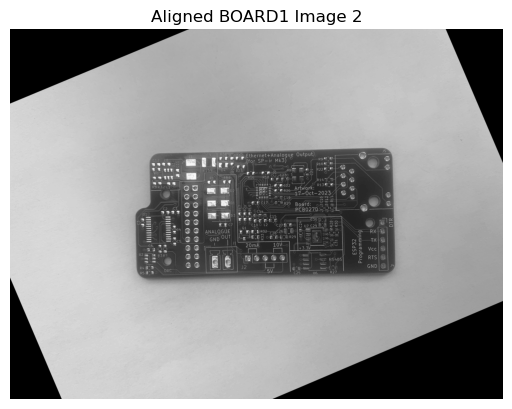

In [5]:
aligned_b1_image2 = aligned_them(images_grey[0][0],images_grey[0][1],1,2)

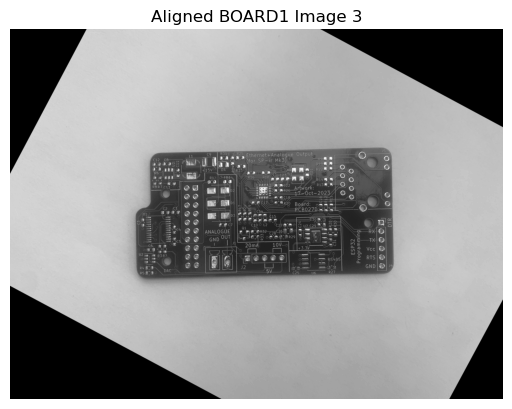

In [6]:
aligned_b1_image3 = aligned_them(images_grey[0][0],images_grey[0][2],1,3)

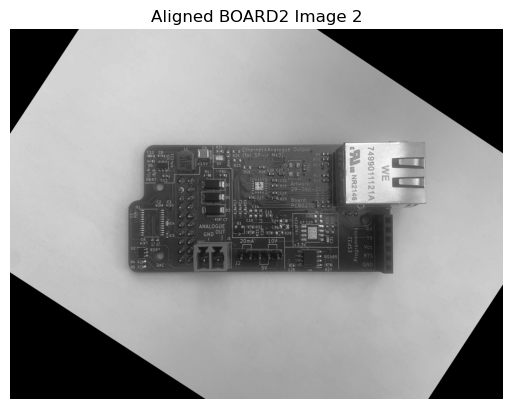

In [7]:
aligned_b2_image2 = aligned_them(images_grey[1][0],images_grey[1][1],2,2)

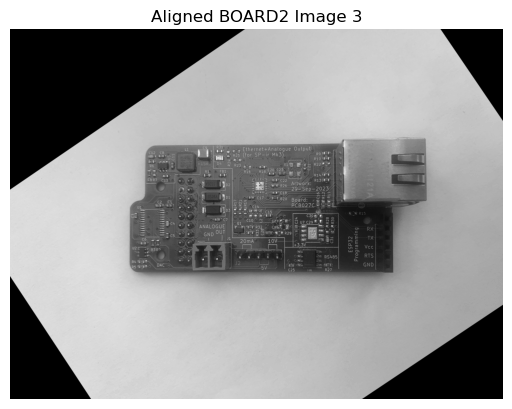

In [8]:
aligned_b2_image3 = aligned_them(images_grey[1][0],images_grey[1][2],2,3)

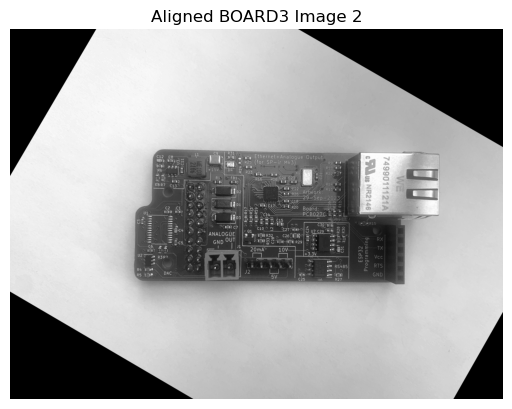

In [9]:
aligned_b3_image2 = aligned_them(images_grey[2][0],images_grey[2][1],3,2)

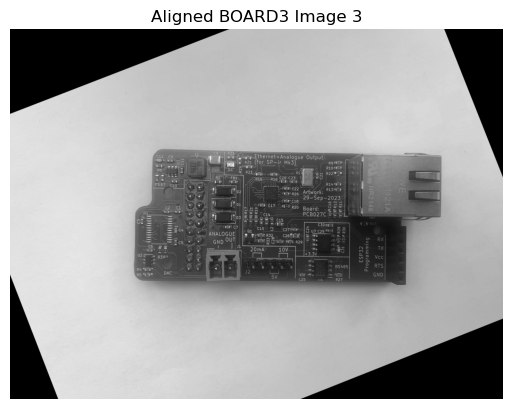

In [10]:
aligned_b3_image3 = aligned_them(images_grey[2][0],images_grey[2][2],3,3)

In [11]:
img_aligned = []
img_b1_aligned = [images_grey[0][0],aligned_b1_image2,aligned_b1_image3]
img_b2_aligned = [images_grey[1][0],aligned_b2_image2,aligned_b2_image3]
img_b3_aligned = [images_grey[2][0],aligned_b3_image2,aligned_b3_image3]
img_aligned.append(img_b1_aligned)
img_aligned.append(img_b2_aligned)
img_aligned.append(img_b3_aligned)

In [12]:
for i in range(len(img_aligned)):
    for j in range(len(img_aligned[i])):
        cv2.imwrite(str(i)+str(j)+".png", img_aligned[i][j])

In [13]:
# Average the two images by blending them together with equal weight
def average_images(img1, img2):
    """
    This function takes two images, converts them to the same size and mode if necessary,
    and returns a new image that is the average of the two.
    """
    # Ensure both images are the same size
    img1 = img1.resize(img2.size, Image.LANCZOS)

    # Ensure both images are in the same mode
    if img1.mode != img2.mode:
        img1 = img1.convert(img2.mode)

    # Blend the images together with equal weight to both
    return Image.blend(img1, img2, alpha=0.5)

In [19]:
# Load images again to ensure we're working with the original data
image1 = Image.open('00.png')
image2 = Image.open('01.png')
image3 = Image.open('02.png')

# Average the images
average_image = average_images(image2, image1)
# average_image = average_images(average_image, image1)
# Save the averaged image
average_image_path = 'b1_averaged_image.png'
average_image.save(average_image_path)



In [20]:
# Load images again to ensure we're working with the original data
image1 = Image.open('10.png')
image2 = Image.open('11.png')
image3 = Image.open('12.png')

# Average the images
# average_image = average_images(image2)#, image3
average_image = average_images(image2, image1)
# Save the averaged image
average_image_path = 'b2_averaged_image.png'
average_image.save(average_image_path)



In [21]:
# Load images again to ensure we're working with the original data
image1 = Image.open('20.png')
image2 = Image.open('21.png')
image3 = Image.open('22.png')

# Average the images
average_image = average_images(image2, image1)
# average_image = average_images(average_image, image1)
# Save the averaged image
average_image_path = 'b3_averaged_image.png'
average_image.save(average_image_path)

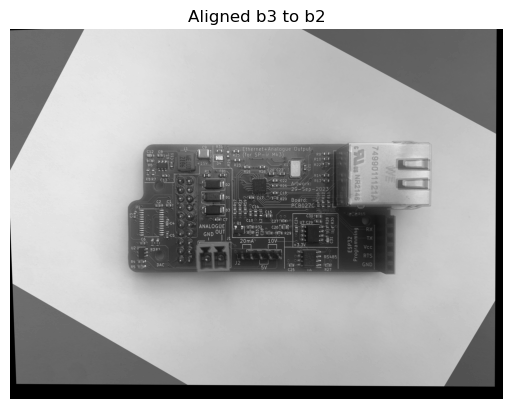

True

In [24]:
path = 'b2_averaged_image.png'
im = cv2.imread(path)
grey2 = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

path = 'b3_averaged_image.png'
im = cv2.imread(path)
grey3 = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

aligned_b3_to_b2 = align_images(grey2, grey3)

plt.imshow(aligned_b3_to_b2, cmap='gray')
plt.title('Aligned b3 to b2')
plt.axis('off')
plt.show()

cv2.imwrite("b3_avg_aligned.png", aligned_b3_to_b2)

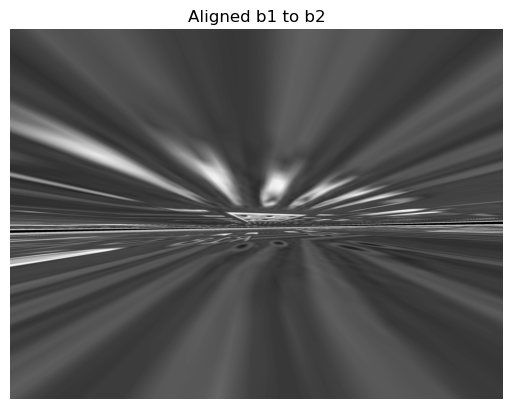

True

In [33]:
path = 'b1_averaged_image.png'
im = cv2.imread(path)
grey1 = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

path = 'b3_avg_aligned.png'
im = cv2.imread(path)
grey2 = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

aligned_b2_to_b1 = align_images(grey2, grey1)

plt.imshow(aligned_b2_to_b1, cmap='gray')
plt.title('Aligned b1 to b2')
plt.axis('off')
plt.show()

cv2.imwrite("b1_avg_aligned.png", aligned_b2_to_b1)

In [ ]:
from skimage.io import imread

# Load an image
image_path = 'b3_avg_aligned.png'  # Replace with the path to your image
image = imread(image_path)

# Determine the number of channels
if image.ndim == 2:
    channels = 1  # Grayscale image
elif image.shape[2] == 3:
    channels = 3  # RGB image
elif image.shape[2] == 4:
    channels = 4  # RGBA image

print(f"The image has {channels} channels.")


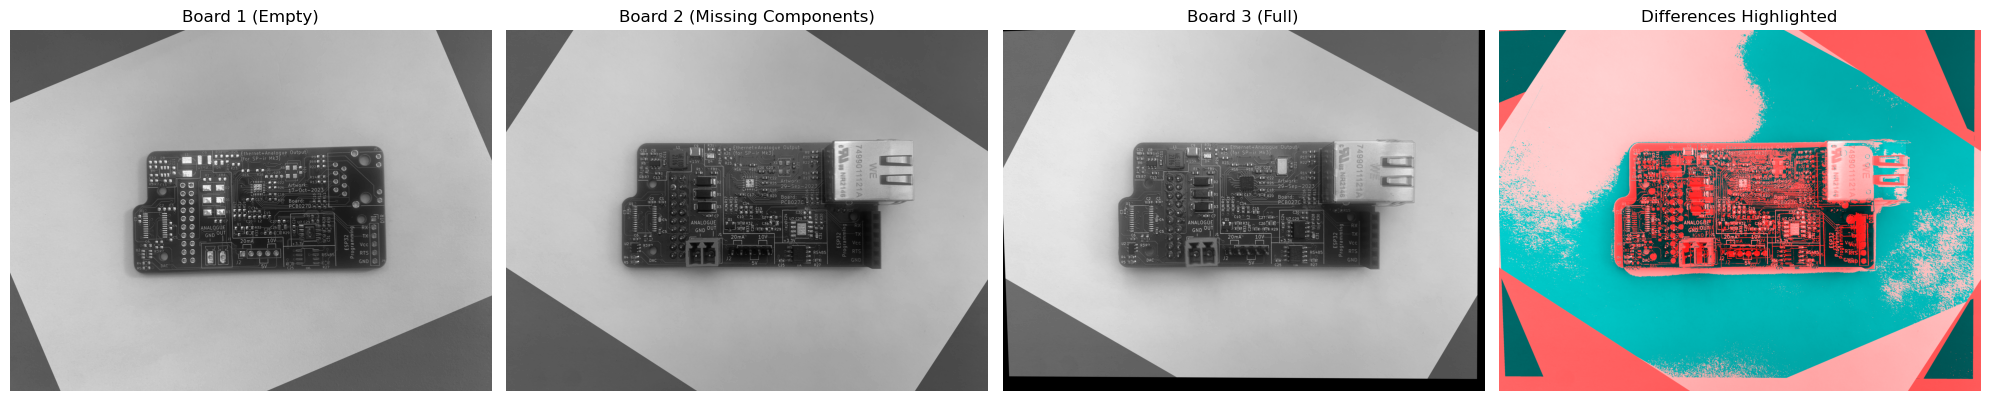

In [31]:
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt

# Load the images
b1_img = imread('b1_averaged_image.png')  # Replace with your image path
# Load the images directly as grayscale
b2_img = imread('b2_averaged_image.png')  # Replace with your image path
b3_img = imread('b3_avg_aligned.png')  # Replace with your image path

# Convert images to float
b1_img_float = b1_img.astype('float64')
b2_img_float = b2_img.astype('float64')
b3_img_float = b3_img.astype('float64')

# Compute differences
diff_b1_b2 = np.abs(b1_img_float - b2_img_float)
diff_b1_b3 = np.abs(b1_img_float - b3_img_float)

# Combine the differences
combined_diff = np.maximum(diff_b1_b2, diff_b1_b3)

# Normalize and threshold
combined_diff_normalized = (combined_diff - np.min(combined_diff)) / (np.max(combined_diff) - np.min(combined_diff))
threshold_value = 0.1
combined_diff_thresholded = combined_diff_normalized > threshold_value

# Prepare highlighted image
highlighted = np.zeros(b3_img.shape + (3,))
highlighted[..., 0] = combined_diff_thresholded  # Red channel
highlighted[..., 1] = b2_img_float / np.max(b2_img_float)  # Green channel
highlighted[..., 2] = b2_img_float / np.max(b2_img_float)  # Blue channel

# Display the images
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

axes[0].imshow(b1_img, cmap='gray')
axes[0].set_title('Board 1 (Empty)')
axes[0].axis('off')

axes[1].imshow(b2_img, cmap='gray')
axes[1].set_title('Board 2 (Missing Components)')
axes[1].axis('off')

axes[2].imshow(b3_img, cmap='gray')
axes[2].set_title('Board 3 (Full)')
axes[2].axis('off')

axes[3].imshow(highlighted)
axes[3].set_title('Differences Highlighted')
axes[3].axis('off')

plt.tight_layout()
plt.show()


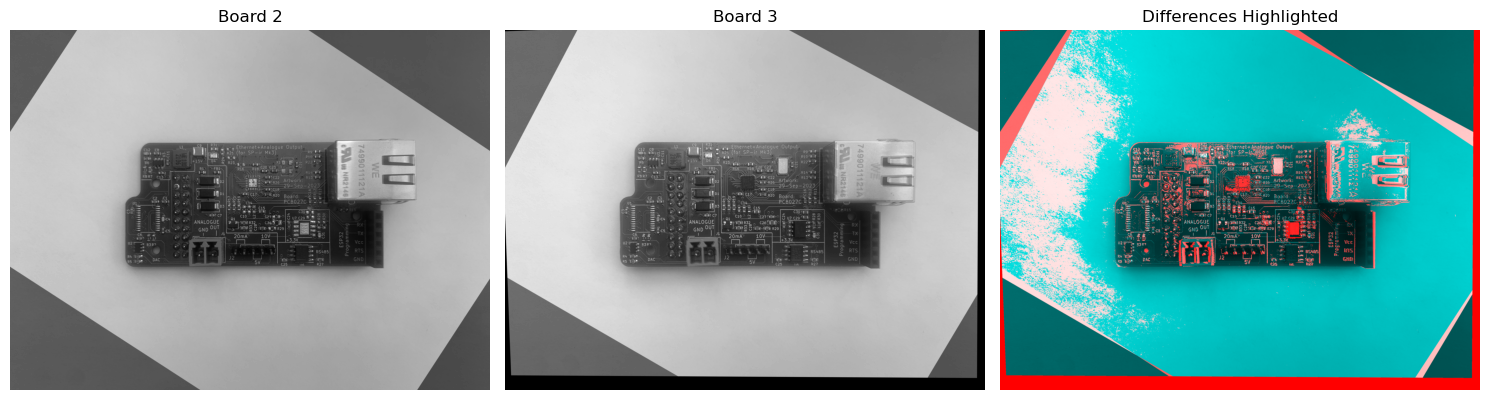

In [26]:
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt

# Load the images directly as grayscale
board2_img = imread('b2_averaged_image.png')  # Replace with your image path
board3_img = imread('b3_avg_aligned.png')  # Replace with your image path

# Convert images to float for processing
board2_img_float = board2_img.astype('float64')
board3_img_float = board3_img.astype('float64')

# Compute the absolute difference between the two images
difference = np.abs(board3_img_float - board2_img_float)

# Normalize the difference image to the range [0, 1] for display purposes
difference_normalized = (difference - np.min(difference)) / (np.max(difference) - np.min(difference))

# Apply a threshold to the normalized difference to highlight significant differences
threshold_value = 0.1  # This can be adjusted based on your specific case
difference_thresholded = difference_normalized > threshold_value

# Prepare the highlighted image
highlighted = np.zeros(board3_img.shape + (3,))
highlighted[..., 0] = difference_thresholded  # Red channel
highlighted[..., 1] = board3_img_float / np.max(board3_img_float)  # Green channel
highlighted[..., 2] = board3_img_float / np.max(board3_img_float)  # Blue channel

# Display the original images and the difference
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(board2_img, cmap='gray')
axes[0].set_title('Board 2')
axes[0].axis('off')

axes[1].imshow(board3_img, cmap='gray')
axes[1].set_title('Board 3')
axes[1].axis('off')

# Highlight the differences in red on the BOARD3 image
axes[2].imshow(highlighted)
axes[2].set_title('Differences Highlighted')
axes[2].axis('off')

plt.tight_layout()
plt.show()
